In [1]:
#!pip install calplot
import calplot
import pandas as pd
import numpy as np 
import pandas as pd
import gensim
from gensim.corpora import Dictionary
from math import log
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("laid_off_set.csv")
#df

In [3]:
df=df.drop(columns=['Unnamed: 0'])


In [4]:
companies = ["DoorDash","Meta", "Amazon", "Twitter", "Microsoft", "Oracle", "Cisco", "Goldman Sachs", "Salesforce", "HP", "Walmart", "Coinbase"]

In [5]:
Companies2 = ["Google", "Indeed", "Byju's", "SAP", "Twitter", "IBM", "Philips", "Cisco", "Dell", "Amazon", "Salesforce", "Ericsson", "Meta", "Microsoft", "Crypto.com", "PayPal", "Wayfair", "Just Eat", "Yahoo", "Carvana", "OLX Group", "Twilio", "GoTo Group", "Vacasa", "Lam Research", "Zoom", "DoorDash", "Kraken", "Capital One", "Stripe", "NetApp", "Coinbase", "Jumia", "Black Shark", "Redfin", "Arrival", "Xero", "Lyft", "Amdocs", "DocuSign", "Misfits Market", "Flexport", "HelloFresh", "OYO", "Playtika", "Spotify", "Opendoor", "GoDaddy", "Workday", "Doma", "Peloton", "Noom", "Sema", "Illumina", "Infarm", "ShareChat", "PagBank", "Groupon", "HubSpot", "eBay", "Affirm", "Thoughtworks", "Atlassian", "SiriusXM", "Informatica", "Sophos", "Cerebral", "MindBody", "Juul", "Pluralsight", "Pico Interactive", "Alerzo", "Cue", "Vedantu", "Swiggy", "Clear Capital", "CommerceHub", "Wix", "Upstart", "Shutterfly", "Moladin", "iFood", "SkipTheDishes", "Udaan", "Unacademy", "Zendesk", "TuSimple", "Deliveroo", "Intel", "Blend", "Loft", "Luno", "Freshly", "Splunk", "Marvell", "Fate Therapeutics", "Zillow", "Kry", "Flyhomes", "iFit", "Nuro", "Wildlife Studios", "Lightspeed Commerce", "Teladoc Health", "WeWork", "Okta", "Loggi", "Tencent", "SAP Labs", "Sono Motors"]

In [6]:
def extract_company(job_title):
    if " at " in job_title:
        company = job_title.split(" at ")[-1]
    elif " @ " in job_title:
        company = job_title.split(" @ ")[-1]
    elif " for " in job_title:
        company = job_title.split(" for ")[-1]
    elif " - " in job_title:
        company = job_title.split(" - ")[-1]
    else:
        company = ""
    return company

In [7]:
jobs=df['job']
jobs.head


<bound method NDFrame.head of 0        \n            Global Speaker & Corporate Train...
1        \n            Senior Client Partner | #paid\n ...
2        \n            #Recruiter #talentacquisition\n ...
3        \n            Software Development Engineer\n ...
4        \n            Vice President, Indirect Channel...
                               ...                        
11811    \nBusiness & Operations Professional | Helping...
11812                       \n281 followers281 followers\n
11813    \nHappy, hard working IT Professional and Part...
11814                 \n89,176 followers89,176 followers\n
11815    \nPositive Intelligence Trainer/Coach ● Operat...
Name: job, Length: 11816, dtype: object>

In [8]:
company_posts_dict = {}

# Loop over the company names and filter the DataFrame
for company in companies:
    company_posts = df[df['job'].str.contains(company)]
    company_posts_dict[company] = company_posts

# Print the first 5 rows of each company's DataFrame
for company, posts in company_posts_dict.items():
    print(f'Posts for {company}:')
    print(posts.head())
    print('/n')


Posts for DoorDash:
                                                  text   
27   \n\n\n This morning, I woke up to devastating ...  \
32   \n\n\n Hello everyone, I was impacted yesterda...   
188  \n\n\n Tech layoffs just keep stacking. ðŸ˜”Pl...   
323  \n\n\n O primeiro #layoff a gente nunca esquec...   
476  \n\n\n I was caught in the Pluralsight layoffs...   

                                                   job                 date   
27   \n            Technical Recruiting Manager - E...  2022-01-12 00:00:00  \
32   \n            Senior Software Engineer | ex Do...  2022-01-12 00:00:00   
188  \n            Consumer/Growth at DoorDash\n   ...  2022-08-12 00:00:00   
323  \n            Management Director at DoorDash\...  2022-10-12 00:00:00   
476      \n            Ex-DoorDash Recruiter\n          2022-12-13 00:00:00   

     num_reacts  num_cmts  num_rpsts  
27          388         7          1  
32           63        11          2  
188         167         3          0  


In [9]:
x=['Amazon','Twitter','DoorDash','Cisco','GoldmanSachs','Walmart','Salesforce','Hp','Oracle','Microsoft']
y=[]

***AMAZON***


C:\Users\manup\AppData\Local\Temp\ipykernel_32972\4077003260.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amazon_posts_df['date'] = Amazon_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\4077003260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amazon_posts_df['date'] = pd.to_datetime(Amazon_posts_df['date'], format='%Y-%m-%d')
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


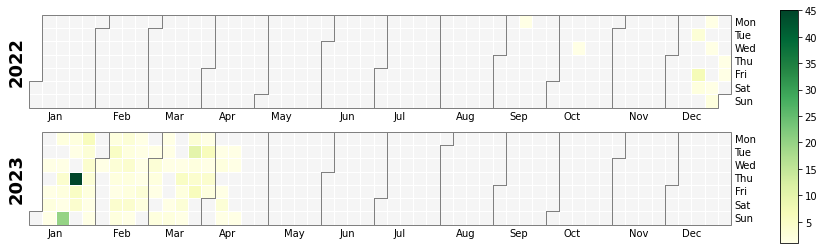

In [10]:
import calplot
import matplotlib.pyplot as plt
import pandas as pd

company_name = 'Amazon'
Amazon_posts_df = company_posts_dict[company_name]
Amazon_posts_df['date'] = Amazon_posts_df['date'].str.replace(' 00:00:00', '')
Amazon_posts_df['date'] = pd.to_datetime(Amazon_posts_df['date'], format='%Y-%m-%d')

data = pd.Series(Amazon_posts_df.groupby('date').size(), index=pd.date_range('2022-09-01', '2023-12-31'))

calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color': 'black', 'fontsize': 18})
plt.show()


In [11]:
# preprocess the text data
preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in Amazon_posts_df["text"]]

dictionary = Dictionary(preprocessed_texts)

corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]

# train an LDA model on the corpus
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)

topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)

#print("The surprise factor for Amazon layoff's  is:", surprise_factor)

***TWITTER***


C:\Users\manup\AppData\Local\Temp\ipykernel_32972\2664569238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Twitter_posts_df['date'] = Twitter_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\2664569238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Twitter_posts_df['date'] = pd.to_datetime(Twitter_posts_df['date'])


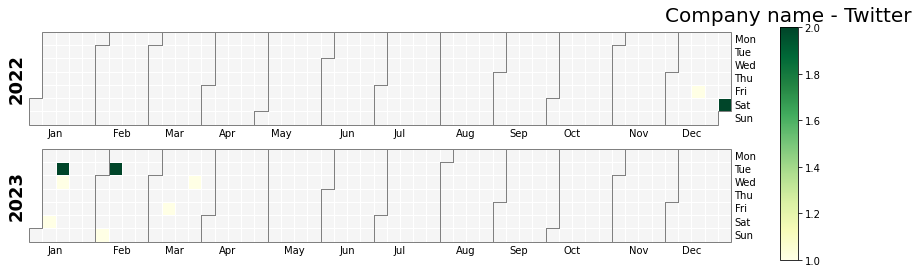

In [12]:
company_name='Twitter'
Twitter_posts_df = company_posts_dict[company_name]
Twitter_posts_df['date'] = Twitter_posts_df['date'].str.replace(' 00:00:00', '')

Twitter_posts_df['date'] = pd.to_datetime(Twitter_posts_df['date'])
data = pd.Series(Twitter_posts_df.groupby('date').size(), index=pd.date_range('2022-09-01', '2023-12-31'))
calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':18})

plt.title('Company name - Twitter', fontsize=20)
plt.show()

In [13]:

preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in Twitter_posts_df["text"]]
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)
#print("The surprise factor for Twitter layoff's  is:", surprise_factor)

***DoorDash***

C:\Users\manup\AppData\Local\Temp\ipykernel_32972\3769485802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DoorDash_posts_df['date'] = DoorDash_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\3769485802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DoorDash_posts_df['date'] = pd.to_datetime(DoorDash_posts_df['date'])


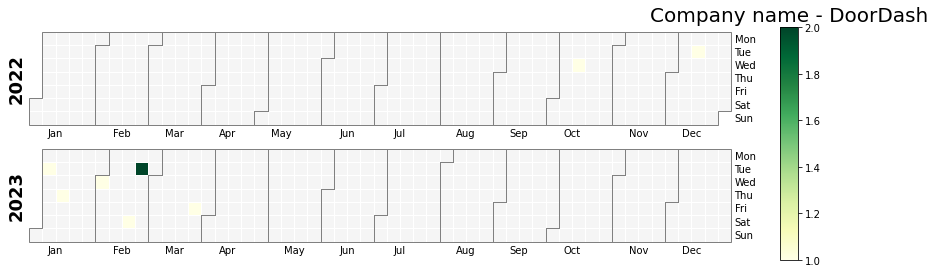

In [14]:


company_name='DoorDash'
DoorDash_posts_df = company_posts_dict[company_name]
DoorDash_posts_df['date'] = DoorDash_posts_df['date'].str.replace(' 00:00:00', '')
DoorDash_posts_df['date'] = pd.to_datetime(DoorDash_posts_df['date'])

data = pd.Series(DoorDash_posts_df.groupby('date').size(), index=pd.date_range('2022-09-01', '2023-12-31'))
calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Company name - DoorDash', fontsize=20)
plt.show()


In [15]:

preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in DoorDash_posts_df["text"]]
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)
#print("The surprise factor for DoorDash layoff's  is:", surprise_factor)

***Cisco***

C:\Users\manup\AppData\Local\Temp\ipykernel_32972\319489516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cisco_posts_df['date'] = Cisco_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\319489516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cisco_posts_df['date'] = pd.to_datetime(Cisco_posts_df['date'])


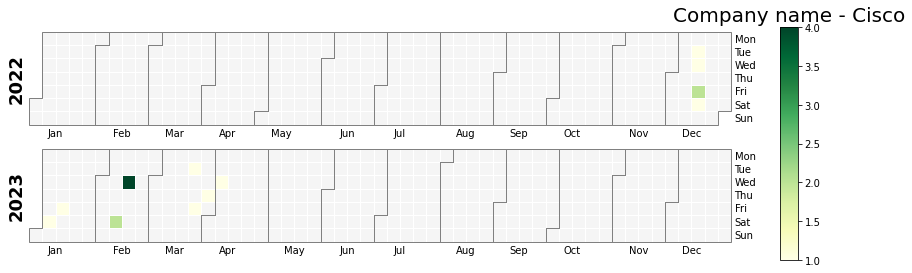

In [16]:
company_name='Cisco'
Cisco_posts_df = company_posts_dict[company_name]
Cisco_posts_df['date'] = Cisco_posts_df['date'].str.replace(' 00:00:00', '')
Cisco_posts_df['date'] = pd.to_datetime(Cisco_posts_df['date'])
# Create a Series with the count of posts for each date
data = pd.Series(Cisco_posts_df.groupby('date').size(), index=pd.date_range('2022-01-01', '2023-12-31'))
calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Company name - Cisco', fontsize=20)
plt.show()


In [17]:
preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in Cisco_posts_df["text"]]
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)
#print("The surprise factor for Cisco layoff's  is:", surprise_factor)

***Goldman Sachs***

C:\Users\manup\AppData\Local\Temp\ipykernel_32972\3810659111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GoldmanSachs_posts_df['date'] = GoldmanSachs_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\3810659111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GoldmanSachs_posts_df['date'] = pd.to_datetime(GoldmanSachs_posts_df['date'])


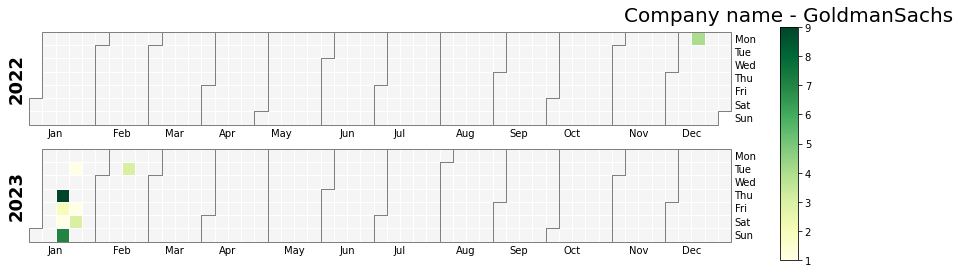

In [18]:
company_name='Goldman Sachs'
GoldmanSachs_posts_df = company_posts_dict[company_name]
GoldmanSachs_posts_df['date'] = GoldmanSachs_posts_df['date'].str.replace(' 00:00:00', '')
GoldmanSachs_posts_df['date'] = pd.to_datetime(GoldmanSachs_posts_df['date'])
# Create a Series with the count of posts for each date
data = pd.Series(GoldmanSachs_posts_df.groupby('date').size(), index=pd.date_range('2022-09-01', '2023-12-31'))
calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Company name - GoldmanSachs', fontsize=20)
plt.show()


In [19]:
preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in GoldmanSachs_posts_df["text"]]
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)
#print("The surprise factor for GoldmanSachs layoff's  is:", surprise_factor)

***Walmart***

C:\Users\manup\AppData\Local\Temp\ipykernel_32972\301024738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Walmart_posts_df['date'] = Walmart_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\301024738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Walmart_posts_df['date'] = pd.to_datetime(Walmart_posts_df['date'])


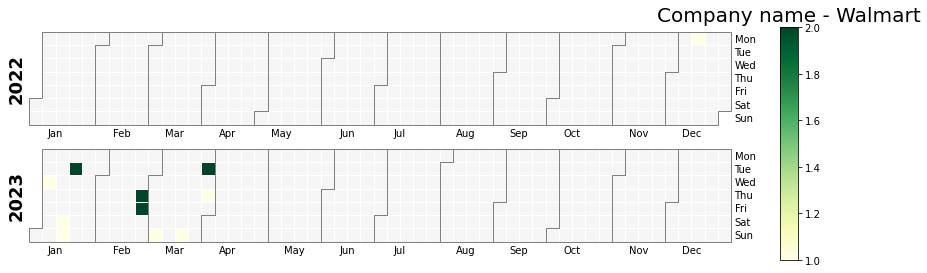

In [20]:
company_name='Walmart'
Walmart_posts_df = company_posts_dict[company_name]
Walmart_posts_df['date'] = Walmart_posts_df['date'].str.replace(' 00:00:00', '')
Walmart_posts_df['date'] = pd.to_datetime(Walmart_posts_df['date'])

data = pd.Series(Walmart_posts_df.groupby('date').size(), index=pd.date_range('2022-09-01', '2023-12-31'))
calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Company name - Walmart', fontsize=20)
plt.show()

In [21]:
preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in Walmart_posts_df["text"]]
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)
#print("The surprise factor for Walmart layoff's  is:", surprise_factor)

***Salesforce***


C:\Users\manup\AppData\Local\Temp\ipykernel_32972\2591572877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Salesforce_posts_df['date'] = Salesforce_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\2591572877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Salesforce_posts_df['date'] = pd.to_datetime(Salesforce_posts_df['date'])


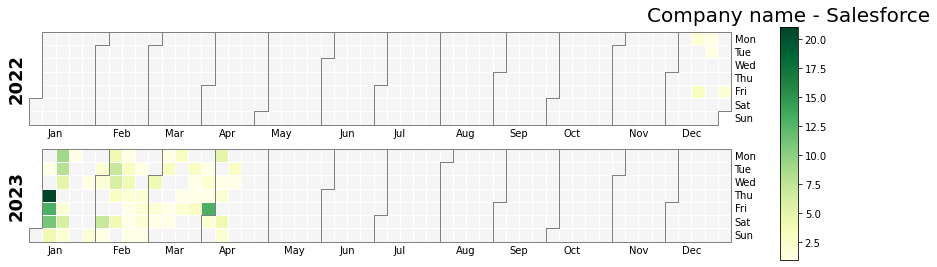

In [22]:
company_name='Salesforce'
Salesforce_posts_df = company_posts_dict[company_name]
Salesforce_posts_df['date'] = Salesforce_posts_df['date'].str.replace(' 00:00:00', '')
Salesforce_posts_df['date'] = pd.to_datetime(Salesforce_posts_df['date'])
# Create a Series with the count of posts for each date
data = pd.Series(Salesforce_posts_df.groupby('date').size(), index=pd.date_range('2022-09-01', '2023-12-31'))
calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Company name - Salesforce', fontsize=20)
plt.show()

In [23]:
preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in Salesforce_posts_df["text"]]
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)
print("The surprise factor for Salesforce layoff's  is:", surprise_factor)

The surprise factor for Salesforce layoff's  is: 68.71119980918546


***HP***

C:\Users\manup\AppData\Local\Temp\ipykernel_32972\140288320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HP_posts_df['date'] = HP_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\140288320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HP_posts_df['date'] = pd.to_datetime(HP_posts_df['date'])


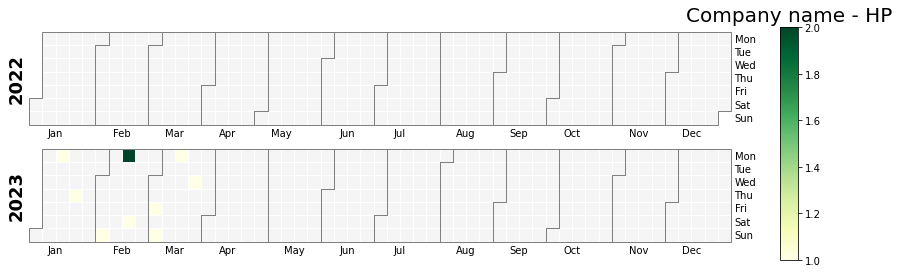

In [24]:
company_name='HP'
HP_posts_df = company_posts_dict[company_name]
HP_posts_df['date'] = HP_posts_df['date'].str.replace(' 00:00:00', '')
HP_posts_df['date'] = pd.to_datetime(HP_posts_df['date'])
data = pd.Series(HP_posts_df.groupby('date').size(), index=pd.date_range('2022-09-01', '2023-12-31'))
calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Company name - HP', fontsize=20)
plt.show()

In [25]:
preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in HP_posts_df["text"]]
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)
#print("The surprise factor for HP layoff's  is:", surprise_factor)

***Oracle***

C:\Users\manup\AppData\Local\Temp\ipykernel_32972\632334218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oracle_posts_df['date'] = Oracle_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\632334218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oracle_posts_df['date'] = pd.to_datetime(Oracle_posts_df['date'])


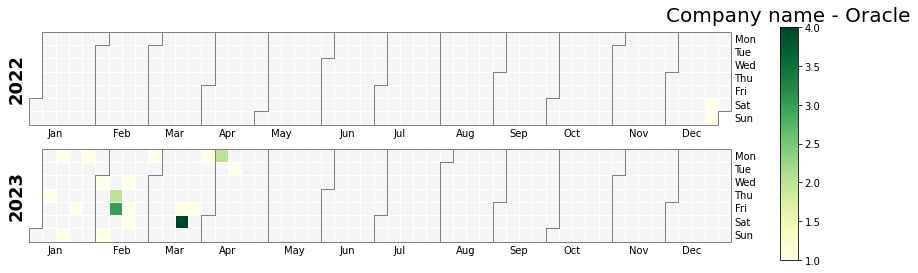

In [26]:
company_name='Oracle'
Oracle_posts_df = company_posts_dict[company_name]
Oracle_posts_df['date'] = Oracle_posts_df['date'].str.replace(' 00:00:00', '')
Oracle_posts_df['date'] = pd.to_datetime(Oracle_posts_df['date'])
data = pd.Series(Oracle_posts_df.groupby('date').size(), index=pd.date_range('2022-09-01', '2023-12-31'))
calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Company name - Oracle', fontsize=20)
plt.show()

In [27]:
preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in Oracle_posts_df["text"]]
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)
#print("The surprise factor for Oracle layoff's  is:", surprise_factor)

***Microsoft***

C:\Users\manup\AppData\Local\Temp\ipykernel_32972\890395179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Microsoft_posts_df['date'] = Microsoft_posts_df['date'].str.replace(' 00:00:00', '')
C:\Users\manup\AppData\Local\Temp\ipykernel_32972\890395179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Microsoft_posts_df['date'] = pd.to_datetime(Microsoft_posts_df['date'])


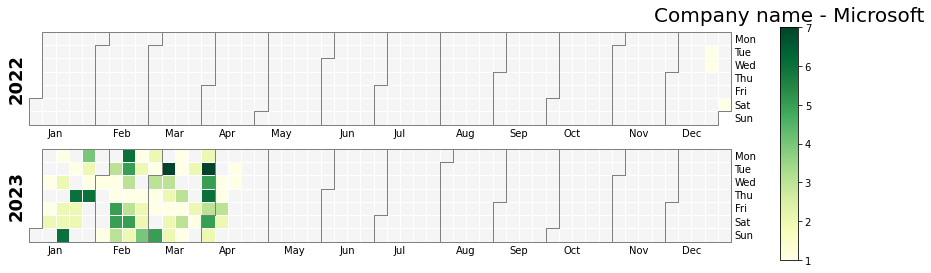

In [28]:
company_name='Microsoft'
Microsoft_posts_df = company_posts_dict[company_name]
Microsoft_posts_df['date'] = Microsoft_posts_df['date'].str.replace(' 00:00:00', '')
Microsoft_posts_df['date'] = pd.to_datetime(Microsoft_posts_df['date'])
data = pd.Series(Microsoft_posts_df.groupby('date').size(), index=pd.date_range('2022-09-01', '2023-12-31'))
calplot.calplot(data, cmap='YlGn', yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Company name - Microsoft', fontsize=20)
plt.show()

In [29]:
preprocessed_texts = [gensim.utils.simple_preprocess(text) for text in Microsoft_posts_df["text"]]
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)
surprise_factor = -sum([prob * log(prob) for doc in topic_dist for _, prob in doc])
y.append(surprise_factor)
#print("The surprise factor for Microsoft layoff's  is:", surprise_factor)

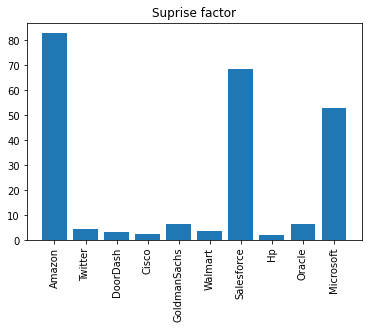

In [30]:
plt.bar(x, y)

# Set title and axis labels
plt.title("Suprise factor")

plt.xticks(rotation=90)
# Display plot
plt.show()